## A program run to identify the optimal moving average parameters for trading a stock
#### Parameters should be window, buy threshold, sell threshold

In [6]:
import numpy as np
import requests
import pandas as pd
import datetime
from bs4 import BeautifulSoup
import pandas_datareader as reader
from datetime import datetime
import datetime
from datetime import timedelta
import matplotlib.pylab as plt

In [14]:
def get_historical_data(ticker):

    time = 130
    try:
        data = reader.get_data_yahoo(symbols=ticker, start=datetime.datetime.now() - timedelta(days=time), end=datetime.datetime.now())
    except:
        data = []
    return data

In [19]:
df = get_historical_data("AAPL")

In [29]:
df['rolling'] = df['Adj Close'].rolling(5).mean()

In [30]:
print(df)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2017-10-23   39.422501   38.875000   39.222500   39.042500   87937200.0   
2017-10-24   39.355000   39.049999   39.072498   39.275002   71028800.0   
2017-10-25   39.387501   38.817501   39.227501   39.102501   84828400.0   
2017-10-26   39.457500   39.195000   39.307499   39.352501   68002000.0   
2017-10-27   40.900002   39.674999   39.822498   40.762501  177816800.0   
2017-10-30   42.017502   40.930000   40.972500   41.680000  178803200.0   
2017-10-31   42.412498   41.735001   41.974998   42.259998  144187200.0   
2017-11-01   42.485001   41.402500   42.467499   41.722500  134551200.0   
2017-11-02   42.125000   41.320000   41.650002   42.027500  165573600.0   
2017-11-03   43.564999   42.779999   43.500000   43.125000  237594400.0   
2017-11-06   43.747501   42.930000   43.092499   43.562500  140105200.0   
2017-11-07   43.812500   

/Users/LukeC/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:278: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0E9)


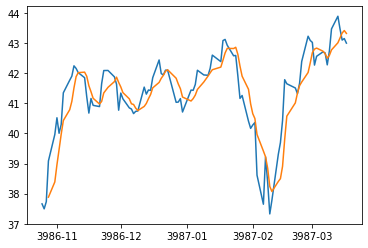

In [33]:
range = 100

plt.plot(df['Adj Close'][1:range])
plt.plot(df['rolling'][1:range])
plt.show()

In [42]:
window = 5
look_ahead = 5
df['rolling'] = df['Adj Close'].rolling(window).mean()

In [61]:
window_vals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
look_ahead_vals = [1,2,3,4,5,6,7,8,9,10]
for window in window_vals:
    df['rolling'] = df['Adj Close'].rolling(window).mean()
    for look_ahead in look_ahead_vals:

        close_prices = df['Adj Close'].values
        average_prices = df['rolling'].values
        total_change = 0
        print(len(close_prices))
        print(len(average_prices))
        for index,value in enumerate(close_prices):
            today_close = close_prices[index]
            today_average = average_prices[index]

            if today_close < today_average:
                try:
                    change = close_prices[index + look_ahead] - today_close
                except:
                    pass
                total_change += change
        print("After this run, the score is: " + str(total_change))
        print("For reference, in total, the stock moved " + str(close_prices[-1] - close_prices[0]) + " in the same interval")

824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 0


After this run, the score is: 88.17983627319336
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 115.81386184692383
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 143.76370239257812
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 194.96798706054688
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 190.71356964111328
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 214.4154281616211
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 221.39126205444336
For reference, in total, the stock moved 96.70340347290039 in the same interval
824
824
After this run, the score is: 226.457603454

In [59]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for n in x:
    print(n)

1
2
3
4
5
6
7
8
9
10


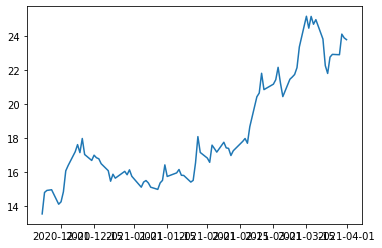

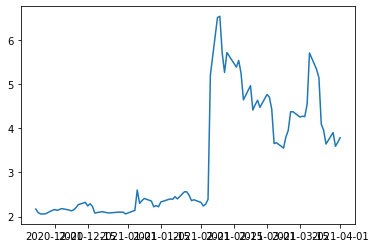

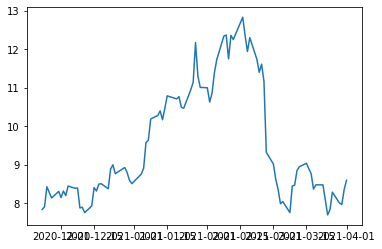

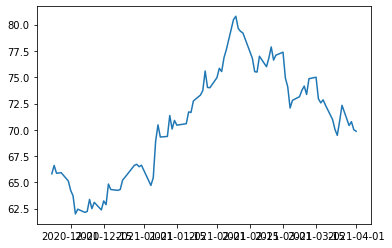

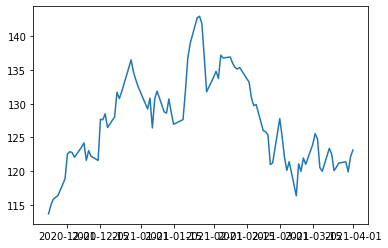

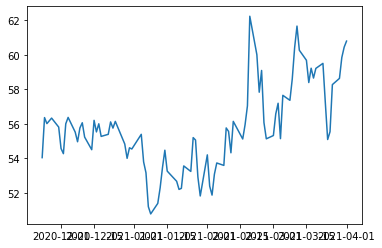

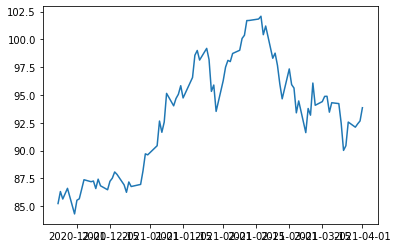

TypeError: list indices must be integers or slices, not str

In [15]:
tickers = [x[0] for x in np.array(pd.read_csv("nasdaq_COMPLETE.csv"))]
for ticker in tickers:
    df = get_historical_data(ticker)
    plt.plot(df['Adj Close'])
    plt.show()